# CLT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Экспоненциальное распределение

Для того чтобы все построилось нормально, необходимо в распределении задать параметр scale равный 1/альфа.

Мы знаем что мат ожидание экспоненциального распределения равно 1/альфа, дисперсия равна квадрату мат ожидания для экспоненциального распределения. Построим соотвествующие графики.

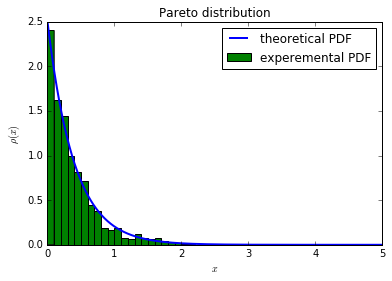

In [8]:
a = 2.5
exp_ds = sts.expon(scale=1/a)

sample = exp_ds.rvs(1000)

x = np.linspace(0, 5, 1000)
rho = exp_ds.pdf(x)
distr = exp_ds.cdf(x)

plt.plot(x, rho, label='theoretical PDF', lw = 2)
plt.hist(sample, bins=50, label='experemental PDF', normed=True, range=(0,5))
plt.title('Pareto distribution')
plt.ylabel('$\\rho(x)$')
plt.xlabel('$x$')
plt.legend()

# Графики

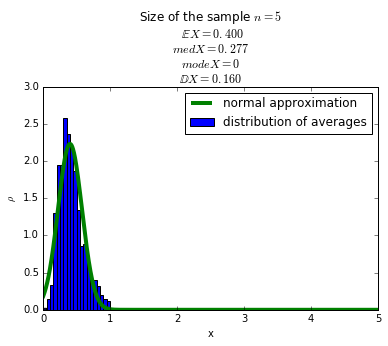

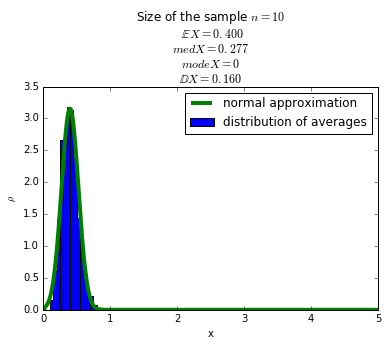

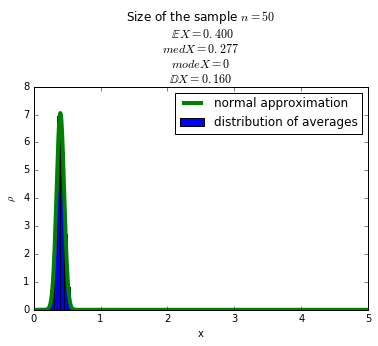

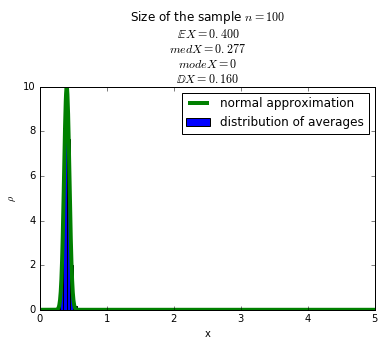

In [9]:
n_vals = np.array([5, 10, 50, 100])
size = 1000
import math

for n in n_vals:
    x_avg = np.array([np.average(exp_ds.rvs(n)) for i in range(0, size)])
    
    plt.hist(x_avg, bins=100, label='distribution of averages', normed=True, range=(0,5))
    
    exp_value = 1.0/a
    med_x = (1.0/a)*math.log(2)
    mode_x = 0
    varc = (1.0/a)**2
    mu = exp_value
    sigm = (varc/n)**0.5
    
    plt.title('Size of the sample $n = %s$\n ' % n 
              + '$\mathbb{E}X = %.3f$\n' % exp_value
              + '$medX = %.3f$\n' % med_x
              + '$modeX = %.f$\n' % mode_x
              + '$\mathbb{D}X = %.3f$' % varc ) 
    plt.xlabel('x')
    plt.ylabel('$\\rho$')
    
    norm_ds = sts.norm(mu, sigm)
    x = np.linspace(0, 5, 1000)
    rho = norm_ds.pdf(x)
    plt.plot(x, rho, label='normal approximation', lw=4)
    
    plt.legend()
    plt.show()

# Выводы

Все получилось, после того как мы применили scale=1/a. Спасибо Дмитрий Ш. за совет про scale во время первого сабмишна. До этого и мат ожидание и дисперсия нормального распределения были не равны сумме наших случайных величин (мат ожидание было левее, и дисперсия была уже).
Таким образом, мы проверили ЦПТ в действии.